## Python statistics essential training - Email analytics challenge

## Objective
* Plot distribution by hour of sent messages seperately
* Overlay plots for each day

In [1]:
# Standard imports
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
messages = pd.read_csv('mbox-cleaned.csv')

In [5]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_localize('UTC').tz_convert('America/Los_Angeles'))

In [6]:
messages['dayofweek'] = pd.Categorical(messages['dayofweek'],
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [7]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>",2017-11-27 14:18:46-08:00,Monday,14.300000,2017.907860
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...",2018-03-26 18:38:16-07:00,Monday,18.633333,2018.234843
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,2018-02-13 14:54:50-08:00,Tuesday,14.900000,2018.122165
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,2018-01-26 11:40:04-08:00,Friday,11.666667,2018.072515
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>",2017-10-30 17:13:00-07:00,Monday,17.216667,2017.831533


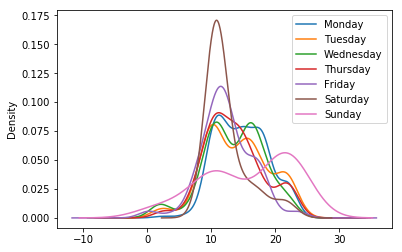

In [8]:
messages.groupby('dayofweek').timeofday.plot(kind='density')
days = messages.dayofweek.cat.categories
plt.legend(days)

In [9]:
messages['timeofday'] = messages['date'].dt.hour
senttimes = messages[['dayofweek', 'timeofday']]

In [10]:
senttimesM = senttimes[senttimes['dayofweek'] == 'Monday'].timeofday.value_counts().sort_index(axis=0)
senttimesT = senttimes[senttimes['dayofweek'] == 'Tuesday'].timeofday.value_counts().sort_index(axis=0)
senttimesW = senttimes[senttimes['dayofweek'] == 'Wednesday'].timeofday.value_counts().sort_index(axis=0)
senttimesR = senttimes[senttimes['dayofweek'] == 'Thursday'].timeofday.value_counts().sort_index(axis=0)
senttimesF = senttimes[senttimes['dayofweek'] == 'Friday'].timeofday.value_counts().sort_index(axis=0)
senttimesSa = senttimes[senttimes['dayofweek'] == 'Saturday'].timeofday.value_counts().sort_index(axis=0)
senttimesSu = senttimes[senttimes['dayofweek'] == 'Sunday'].timeofday.value_counts().sort_index(axis=0)

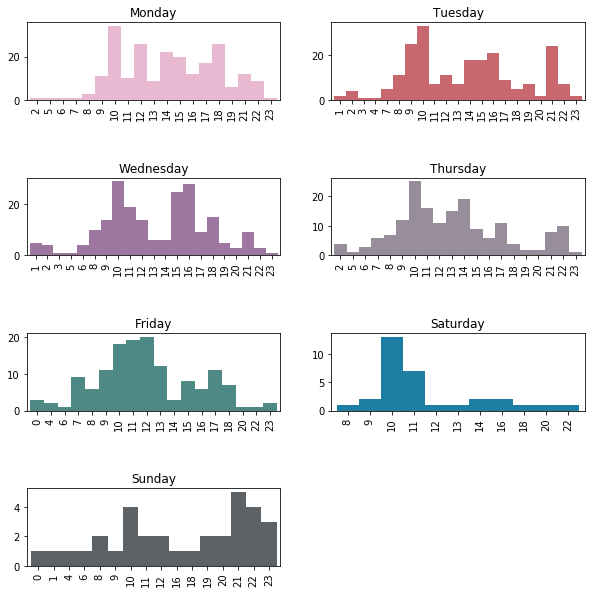

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(421); senttimesM.plot(kind='bar', width=1, color='#E9B9D2'); plt.title('Monday')
plt.subplot(422); senttimesT.plot(kind='bar', width=1, color='#C8686E'); plt.title('Tuesday')
plt.subplot(423); senttimesW.plot(kind='bar', width=1, color='#9E77A0'); plt.title('Wednesday')
plt.subplot(424); senttimesR.plot(kind='bar', width=1, color='#988D9B'); plt.title('Thursday')
plt.subplot(425); senttimesF.plot(kind='bar', width=1, color='#4E8986'); plt.title('Friday')
plt.subplot(426); senttimesSa.plot(kind='bar', width=1, color='#1D7EA4'); plt.title('Saturday')
plt.subplot(427); senttimesSu.plot(kind='bar', width=1, color='#5D6266'); plt.title('Sunday')
plt.subplots_adjust(hspace = 1)

In [12]:
senttimesM = senttimes[senttimes['dayofweek'] == 'Monday']
senttimesT = senttimes[senttimes['dayofweek'] == 'Tuesday']
senttimesW = senttimes[senttimes['dayofweek'] == 'Wednesday']
senttimesR = senttimes[senttimes['dayofweek'] == 'Thursday']
senttimesF = senttimes[senttimes['dayofweek'] == 'Friday']
senttimesSa = senttimes[senttimes['dayofweek'] == 'Saturday']
senttimesSu = senttimes[senttimes['dayofweek'] == 'Sunday']

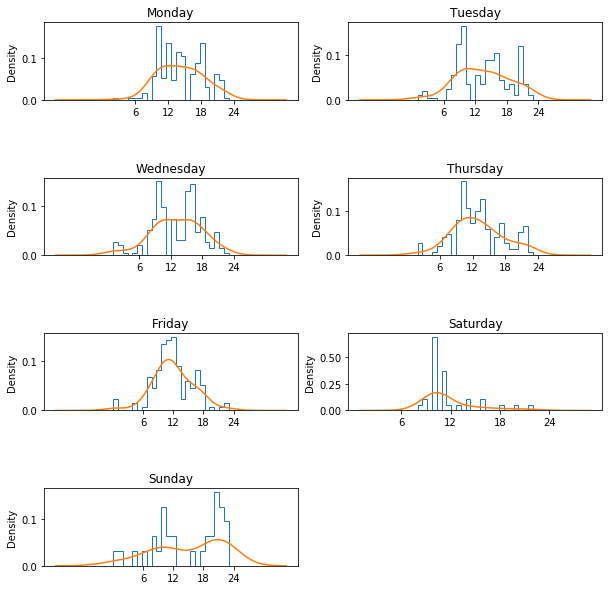

In [13]:
plt.figure(figsize=(10,10))
levels = [6, 12, 18, 24]
plt.subplot(421); 
senttimesM.timeofday.plot(kind= 'hist', xticks=levels, histtype='step',bins=24,density=True);
senttimesM.timeofday.plot.density(bw_method=0.5);
plt.title('Monday')
plt.subplot(422); 
senttimesT.timeofday.plot(kind= 'hist', xticks=levels,histtype='step',bins=24,density=True); 
senttimesT.timeofday.plot.density(bw_method=0.5); 
plt.title('Tuesday')
plt.subplot(423); 
senttimesW.timeofday.plot(kind= 'hist', xticks=levels,histtype='step',bins=24,density=True); 
senttimesW.timeofday.plot.density(bw_method=0.5);
plt.title('Wednesday')
plt.subplot(424); 
senttimesR.timeofday.plot(kind= 'hist', xticks=levels,histtype='step',bins=24,density=True); 
senttimesR.timeofday.plot.density(bw_method=0.5);
plt.title('Thursday')
plt.subplot(425); 
senttimesF.timeofday.plot(kind= 'hist', xticks=levels,histtype='step',bins=24,density=True); 
senttimesF.timeofday.plot.density(bw_method=0.5);
plt.title('Friday')
plt.subplot(426); 
senttimesSa.timeofday.plot(kind= 'hist', xticks=levels,histtype='step',bins=24,density=True); 
senttimesSa.timeofday.plot.density(bw_method=0.5);
plt.title('Saturday')
plt.subplot(427); 
senttimesSu.timeofday.plot(kind= 'hist', xticks=levels,histtype='step',bins=24,density=True); 
senttimesSu.timeofday.plot.density(bw_method=0.5);
plt.title('Sunday')

plt.subplots_adjust(hspace = 1)